In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [67]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [68]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
import matplotlib.pyplot as plt

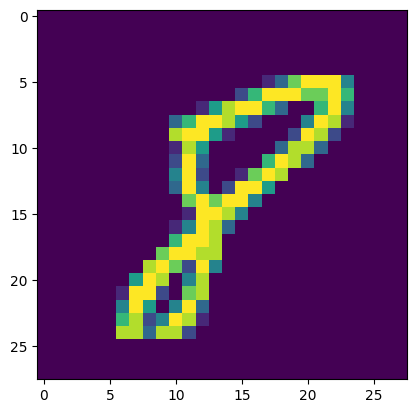

In [70]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [71]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.677365779876709


In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
for  i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf =pca.fit_transform(X_train)
    X_test_trf= pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    accuracy_score(y_test,y_pred)
    print(accuracy_score)

<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>
<function accuracy_score at 0x7d57e8d137e0>


KeyboardInterrupt: 